In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Packages

In [1]:
import numpy as np
import os
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf  
import time
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import SparseTopKCategoricalAccuracy
from tqdm.notebook import tqdm
from sklearn import decomposition
from keras.applications.vgg16 import VGG16
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,GlobalAveragePooling2D,BatchNormalization,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD

#Loading the Data

In [ ]:
%cd /content/drive/MyDrive/18066371_BuiLamVinh_VietnamesFood_Classification

/content/drive/MyDrive/18066371_BuiLamVinh_VietnamesFood_Classification


In [ ]:
!unzip VN_F.zip -d "/content"

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/VN_F/Bun_Dau_Mam_Tom/309.jpg  
  inflating: /content/VN_F/Bun_Dau_Mam_Tom/31.jpg  
  inflating: /content/VN_F/Bun_Dau_Mam_Tom/310.jpg  
  inflating: /content/VN_F/Bun_Dau_Mam_Tom/311.jpg  
  inflating: /content/VN_F/Bun_Dau_Mam_Tom/312.jpg  
  inflating: /content/VN_F/Bun_Dau_Mam_Tom/313.jpg  
  inflating: /content/VN_F/Bun_Dau_Mam_Tom/314.jpg  
  inflating: /content/VN_F/Bun_Dau_Mam_Tom/315.jpg  
  inflating: /content/VN_F/Bun_Dau_Mam_Tom/316.jpg  
  inflating: /content/VN_F/Bun_Dau_Mam_Tom/317.jpg  
  inflating: /content/VN_F/Bun_Dau_Mam_Tom/318.jpg  
  inflating: /content/VN_F/Bun_Dau_Mam_Tom/319.jpg  
  inflating: /content/VN_F/Bun_Dau_Mam_Tom/32.jpg  
  inflating: /content/VN_F/Bun_Dau_Mam_Tom/320.jpg  
  inflating: /content/VN_F/Bun_Dau_Mam_Tom/321.jpg  
  inflating: /content/VN_F/Bun_Dau_Mam_Tom/322.jpg  
  inflating: /content/VN_F/Bun_Dau_Mam_Tom/323.jpg  
  inflating: /content/VN_F/Bun_Dau_Mam_Tom/3

In [ ]:
class_names = ['Banh_Khot', 'Banh_Mi','Banh_Trang_Nuong','Banh_Xeo','Bun_Bo','Bun_Dau_Mam_Tom','Bun_Rieu','Chao_Long','Com_Tam','Pho'] 

class_names_label = {class_name:i for i, class_name in enumerate(class_names)} 

nb_classes = len(class_names) 

IMAGE_SIZE = (224, 224) 
class_names_label

{'Banh_Khot': 0,
 'Banh_Mi': 1,
 'Banh_Trang_Nuong': 2,
 'Banh_Xeo': 3,
 'Bun_Bo': 4,
 'Bun_Dau_Mam_Tom': 5,
 'Bun_Rieu': 6,
 'Chao_Long': 7,
 'Com_Tam': 8,
 'Pho': 9}

In [ ]:
cd /content/

/content


In [ ]:
def load_data(path,folders):  
 
      
    images = []
    labels = []
    
    
    
    for folder in os.listdir(path):
      if folder  == 'Ca_Kho':
        continue      
      label = class_names_label[folder]
      
    
      for file in tqdm(os.listdir(os.path.join(path, folder))[:500]):

          
        img_path = os.path.join(os.path.join(path, folder), file)
      
        if img_path.split('.')[-1] != 'jpg':
          continue

        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, IMAGE_SIZE) 
        
      
        images.append(image)
        labels.append(label)
            
    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')   
      

    return images, labels

In [ ]:
images, labels = load_data('/content/VN_F',class_names)

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/352 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

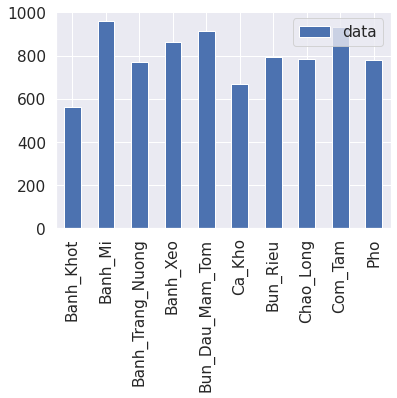

In [ ]:
_, train_counts = np.unique(labels, return_counts=True)
pd.DataFrame({'data': train_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

Agumentation Bánh Khọt, Bánh Tráng Nướng

In [ ]:
# class_names_agu = ['Banh_Khot']

In [ ]:
# images_agu, labels_agu = load_data('/content/vietnames_food/vietnames_food',class_names_agu)
# images, labels = load_data('/content/vietnames_food/vietnames_food',[c for c in class_names if c not in class_names_agu])

# Agumentation Images

Đã dùng agumentation nhưng do colab bị out gam nên bỏ qua bước này

In [ ]:
# data_augmentation = tf.keras.Sequential([
#   tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#   tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
# ])

In [ ]:
# x, y = [], []
# for i in range(len(labels_agu)):
#     img = tf.expand_dims(images_agu[i], 0)
#     for j in range(2):
#         augmented_image= data_augmentation(img)
#         x.append(augmented_image)
#         y.append(labels_agu[i])

In [ ]:
# x = np.array(x).reshape(-1, 224, 224, 3)
# y = np.array(y)
# x.shape, y.shape

((2666, 224, 224, 3), (2666,))

In [ ]:
# train_x = np.vstack([x, images])
# train_y = list(y)+list(labels)
# train_y = np.array(train_y)
# train_x.shape,train_y.shape

((10253, 224, 224, 3), (10253,))

#Explore the dataset

In [ ]:
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size = 0.1)
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size = 0.1)

In [ ]:
print ("Số lượng mẫu train: {}".format(len(train_labels)))
print ("Số lượng mẫu val: {}".format(len(val_labels)))
print ("Số lượng mẫu test: {}".format(len(test_labels)))
print ("Mỗi hình ảnh có kích thước: {}".format(IMAGE_SIZE))

Số lượng mẫu train: 6504
Số lượng mẫu val: 804
Số lượng mẫu test: 723
Mỗi hình ảnh có kích thước: (224, 224)


# Shuffle and Scale data

In [ ]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=10) # shuffle data

In [ ]:
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

#Visualize the data

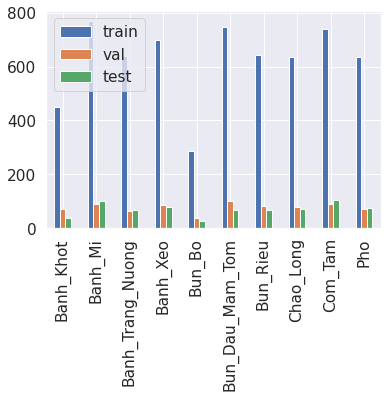

In [ ]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, val_counts = np.unique(val_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)

pd.DataFrame({'train': train_counts, 'val': val_counts, 'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

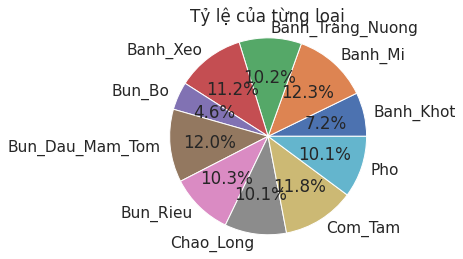

In [ ]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0), 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Tỷ lệ của từng loại')
plt.show()

In [ ]:
def display_examples(class_names, images, labels,title='Some examples of images of the dataset'):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle(title, fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]].replace('_',' '))
    plt.show()

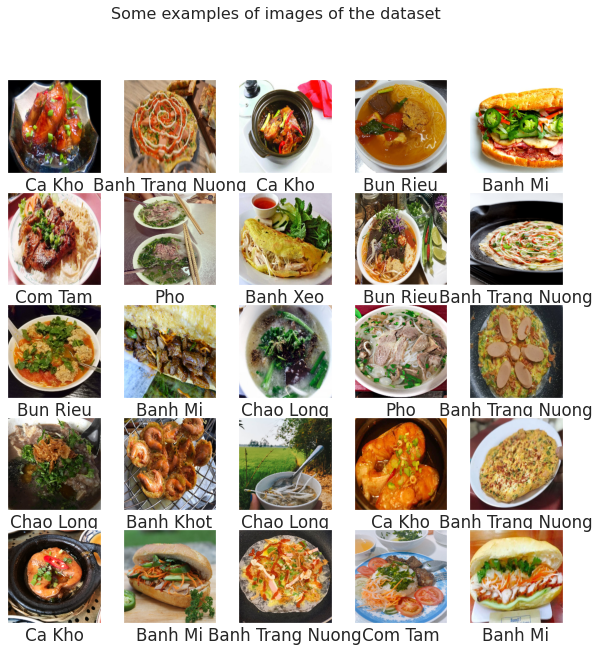

In [ ]:
display_examples(class_names, images, labels)

In [ ]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]].replace('_',' '))
    plt.show()

# Base CNN Model

In [15]:
model = Sequential([                           
              Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',activation ='relu', input_shape = (160,160,3)),
              MaxPooling2D(2,2),
              Dropout(0.2),

              BatchNormalization(),
              Conv2D(128, (5,5), activation = 'relu',padding = 'same'),

              MaxPooling2D(2,2),
              Dropout(0.2),

              BatchNormalization(),

              Dense(128, activation = 'relu'),
              Dense(128, activation = 'relu'),
              Dense(128, activation = 'relu'),

              Dense(4, activation = 'softmax')
  ])

In [16]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 160, 160, 64)      1792      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 80, 80, 64)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 80, 80, 64)        0         
                                                                 
 batch_normalization_14 (Bat  (None, 80, 80, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_39 (Conv2D)          (None, 80, 80, 128)       204928    
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 40, 40, 128)     

## Base model 1

In [10]:
model = Sequential([                           
              Conv2D(filters = 32, kernel_size = (3,3),padding = 'same',activation ='relu', input_shape = (160,160,3)),
              MaxPooling2D(2,2),
              Conv2D(64, (3,3), activation = 'relu',padding = 'same'),
              Conv2D(64, (3,3), activation = 'relu',padding = 'same'),
              Dropout(0.2),
              MaxPooling2D(2,2),
              MaxPooling2D(2,2),
              Conv2D(128, (3,3), activation = 'relu',padding = 'same'),
              MaxPooling2D(2,2),
              Conv2D(256, (3,3), activation = 'relu',padding = 'same'),            
              MaxPooling2D(2,2),         
              Conv2D(512, (3,3), activation = 'relu',padding = 'same'),
              MaxPooling2D(2,2),
              Flatten(),
              Dense(4, activation = 'softmax')
  ])

In [11]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 160, 160, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 80, 80, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 80, 80, 64)        18496     
                                                                 
 conv2d_30 (Conv2D)          (None, 80, 80, 64)        36928     
                                                                 
 dropout_19 (Dropout)        (None, 80, 80, 64)        0         
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 40, 40, 64)       0         
 g2D)                                                 

In [ ]:
model = Sequential([                           
              Conv2D(filters = 32, kernel_size = (3,3),padding = 'same',activation ='relu', input_shape = (224,224,3)),
              MaxPooling2D(2,2),
              Conv2D(64, (3,3), activation = 'relu',padding = 'same'),
              BatchNormalization(),
              MaxPooling2D(2,2),
              Conv2D(64, (3,3), activation = 'relu',padding = 'same'),
              BatchNormalization(),
              MaxPooling2D(2,2),
              Dropout(0.2),
              Conv2D(128, (3,3), activation = 'relu',padding = 'same'),
              MaxPooling2D(2,2),
              Dropout(0.2),
              Conv2D(128, (3,3), activation = 'relu',padding = 'same'),
              MaxPooling2D(2,2),
              Dropout(0.2),
              Conv2D(256, (3,3), activation = 'relu',padding = 'same'),
              BatchNormalization(),
              MaxPooling2D(2,2),
              Dropout(0.2),
              Conv2D(512, (3,3), activation = 'relu',padding = 'same'),
              BatchNormalization(),
              MaxPooling2D(2,2),
              Dropout(0.2),
              Flatten(),
              Dropout(0.3),
              Dense(512, activation = 'relu'),
              BatchNormalization(),
              Dropout(0.2),
              Dense(256, activation = 'relu'),
              Dense(nb_classes, activation = 'softmax')
  ])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
batch_normalization_6 (Batch (None, 56, 56, 64)       

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs = 25, batch_size = 32, validation_data = (val_images, val_labels))

Epoch 1/25
204/204 [==============================] - 30s 57ms/step - loss: 2.2930 - accuracy: 0.2328 - val_loss: 5.8221 - val_accuracy: 0.1443
Epoch 2/25
204/204 [==============================] - 10s 50ms/step - loss: 1.8910 - accuracy: 0.3416 - val_loss: 2.5305 - val_accuracy: 0.2214
Epoch 3/25
204/204 [==============================] - 10s 51ms/step - loss: 1.6831 - accuracy: 0.4148 - val_loss: 1.6953 - val_accuracy: 0.4465
Epoch 4/25
204/204 [==============================] - 10s 51ms/step - loss: 1.5235 - accuracy: 0.4794 - val_loss: 1.7753 - val_accuracy: 0.4453
Epoch 5/25
204/204 [==============================] - 10s 51ms/step - loss: 1.4332 - accuracy: 0.5097 - val_loss: 3.7172 - val_accuracy: 0.2027
Epoch 6/25
204/204 [==============================] - 10s 51ms/step - loss: 1.2885 - accuracy: 0.5580 - val_loss: 2.1192 - val_accuracy: 0.4192
Epoch 7/25
204/204 [==============================] - 10s 51ms/step - loss: 1.2194 - accuracy: 0.5890 - val_loss: 1.5533 - val_accuracy:

In [ ]:
def plot_accuracy_loss(history,path):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.savefig(path)
    plt.show()


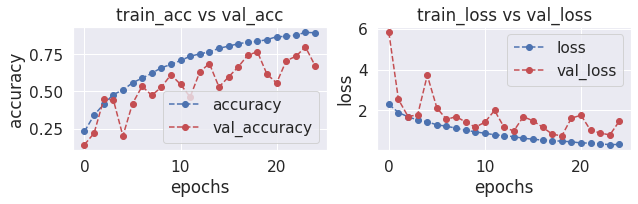

In [ ]:
path = '/content/drive/MyDrive/18066371_BuiLamVinh_VN_Food_Classifier'
plot_accuracy_loss(history,path)

In [ ]:
model.evaluate(test_images, test_labels)

23/23 [==============================] - 1s 35ms/step - loss: 1.2787 - accuracy: 0.6722


[1.2787057161331177, 0.6721991896629333]

## Base model 2

In [ ]:
ipt = Input(shape = (224, 224, 3))
x = Conv2D(32, 3, 1, activation='relu', padding = 'valid')(ipt)
x = Conv2D(32, 3, 1, activation='relu', padding = 'valid')(x)
mp = MaxPooling2D()(x)

x = Conv2D(32, 3, 1, activation='relu', padding='same')(mp)
x = Conv2D(32, 3, 1, activation='relu', padding='same')(x)
x = tf.keras.layers.Add()([x, mp])
mp = MaxPooling2D()(x)
x = Dropout(0.2)(mp)

x = Conv2D(256, 3, 1, activation='relu', padding='same')(x)
x = Conv2D(256, 3, 1, activation='relu', padding='same')(x)
x = Dropout(0.2)(mp)
mp = MaxPooling2D()(x)


x = Conv2D(256, 3, 1, activation='relu', padding='same')(mp)
x = Conv2D(256, 3, 1, activation='relu', padding='same')(x)
x = Dropout(0.2)(mp)
x = tf.keras.layers.Add()([x, mp])
mp = MaxPooling2D()(x)


x = Conv2D(256, 3, 1, activation='relu', padding='same')(mp)
x = Conv2D(512, 3, 1, activation='relu', padding='same')(x)
x = Dropout(0.2)(mp)
mp = MaxPooling2D()(x)


x = Conv2D(512, 3, 1, activation='relu', padding='same')(mp)
x = Dropout(0.2)(mp)
x = tf.keras.layers.Add()([x, mp])
mp = MaxPooling2D()(x)


x = Flatten()(mp)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(nb_classes, activation='softmax')(x)


model_n = tf.keras.Model(inputs = ipt, outputs = x)
model_n.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_n.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 222, 222, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 220, 220, 32) 9248        conv2d_14[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_14 (MaxPooling2D) (None, 110, 110, 32) 0           conv2d_15[0][0]                  
______________________________________________________________________________________________

In [ ]:
history_n = model_n.fit(train_images, train_labels, batch_size=32, epochs=30, validation_data = (val_images, val_labels))

Epoch 1/30
204/204 [==============================] - 18s 81ms/step - loss: 2.2639 - accuracy: 0.2036 - val_loss: 2.0244 - val_accuracy: 0.3035
Epoch 2/30
204/204 [==============================] - 15s 75ms/step - loss: 1.8506 - accuracy: 0.3533 - val_loss: 1.8126 - val_accuracy: 0.3980
Epoch 3/30
204/204 [==============================] - 15s 76ms/step - loss: 1.6217 - accuracy: 0.4374 - val_loss: 1.6205 - val_accuracy: 0.4938
Epoch 4/30
204/204 [==============================] - 15s 76ms/step - loss: 1.4876 - accuracy: 0.4889 - val_loss: 1.4965 - val_accuracy: 0.5435
Epoch 5/30
204/204 [==============================] - 16s 76ms/step - loss: 1.3960 - accuracy: 0.5208 - val_loss: 1.5239 - val_accuracy: 0.5124
Epoch 6/30
204/204 [==============================] - 16s 76ms/step - loss: 1.3277 - accuracy: 0.5440 - val_loss: 1.4236 - val_accuracy: 0.5634
Epoch 7/30
204/204 [==============================] - 16s 76ms/step - loss: 1.2690 - accuracy: 0.5677 - val_loss: 1.3924 - val_accuracy:

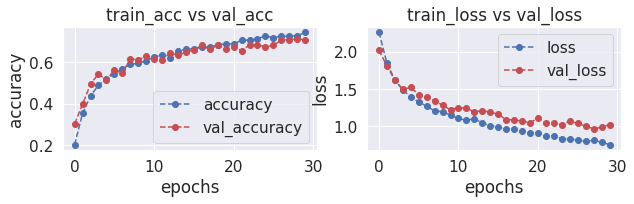

In [ ]:
plot_accuracy_loss(history_n,path)

In [ ]:
score2 = model_n.evaluate(test_images, test_labels)

23/23 [==============================] - 1s 41ms/step - loss: 1.0551 - accuracy: 0.6708


Mô hình cnn đơn giản này chưa tốt cho tập dữ liệu này

# Feature extraction with VGG16

In [ ]:
model_vgg16 = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
train_features = model_vgg16.predict(train_images)
test_features = model_vgg16.predict(test_images)

In [ ]:
n_train, x, y, z = train_features.shape
numFeatures = x * y * z

In [ ]:
pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, numFeatures))
pca.fit(X)

C = pca.transform(X) 
C1 = C[:,0]
C2 = C[:,1]

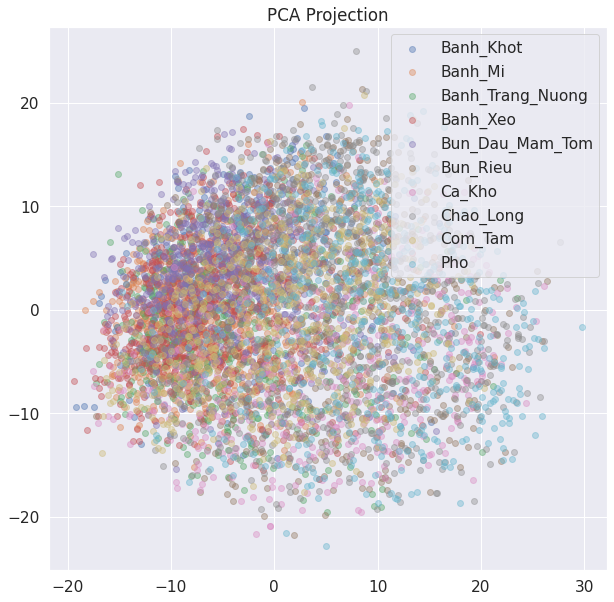

In [ ]:
plt.subplots(figsize=(10,10))
for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

# Training on top of VGG16 with fearture extraction

Có thể xác định các cụm nhờ PCA này. Các cụm tương ứng nhiều hơn hoặc ít hơn với các nhãn. Các điểm của 1 số món ăn rất gần nhau, khó phân biệt vì món ăn việt nam món nào cũng có rau và nước chấm.

In [ ]:
model_ft = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)), 
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(nb_classes, activation=tf.nn.softmax)  
])

model_ft.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_ft = model2.fit(train_features, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
42/42 [==============================] - 1s 10ms/step - loss: 1.4387 - accuracy: 0.5319 - val_loss: 0.9372 - val_accuracy: 0.7162
Epoch 2/10
42/42 [==============================] - 0s 6ms/step - loss: 0.6826 - accuracy: 0.7950 - val_loss: 0.7001 - val_accuracy: 0.7665
Epoch 3/10
42/42 [==============================] - 0s 7ms/step - loss: 0.4714 - accuracy: 0.8596 - val_loss: 0.6214 - val_accuracy: 0.7920
Epoch 4/10
42/42 [==============================] - 0s 6ms/step - loss: 0.3372 - accuracy: 0.9150 - val_loss: 0.5759 - val_accuracy: 0.8101
Epoch 5/10
42/42 [==============================] - 0s 6ms/step - loss: 0.2578 - accuracy: 0.9439 - val_loss: 0.5920 - val_accuracy: 0.8003
Epoch 6/10
42/42 [==============================] - 0s 6ms/step - loss: 0.1999 - accuracy: 0.9615 - val_loss: 0.5559 - val_accuracy: 0.8191
Epoch 7/10
42/42 [==============================] - 0s 6ms/step - loss: 0.1436 - accuracy: 0.9795 - val_loss: 0.5487 - val_accuracy: 0.8161
Epoch 8/10
42/42 [=

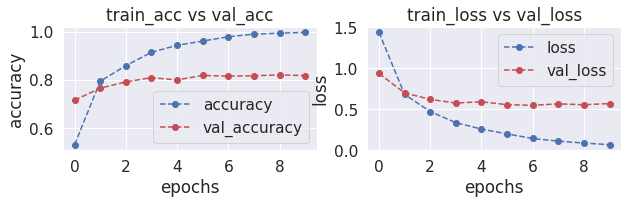

In [ ]:
plot_accuracy_loss(history_ft,path)

In [ ]:
l,acc = model_ft.evaluate(test_features, test_labels)


23/23 [==============================] - 0s 3ms/step - loss: 0.8652 - accuracy: 0.7535


# Implements VGG16

## Stage 1: Tranfer learning

In [ ]:
if not os.path.exists('Models/VGG16'):
    os.mkdir('Models/VGG16')
PATH = 'Models/VGG16'

BASE_MODEL_BEST = os.path.join(PATH, 'base_model_best.hdf5')
BASE_MODEL_TRAINED = os.path.join(PATH, 'base_model_trained.hdf5')
BASE_MODEL_FIG = os.path.join(PATH, 'base_model_fig.jpg')

FINE_TUNE_MODEL_BEST = os.path.join(PATH, 'fine_tune_model_best.hdf5')
FINE_TUNE_MODEL_TRAINED = os.path.join(PATH, 'fine_tune_model_trained.hdf5')
FINE_TUNE_MODE_FIG = os.path.join(PATH, 'fine_tune_model_fig.jpg')

In [ ]:
base_checkpointer = ModelCheckpoint(
    filepath = BASE_MODEL_BEST, 
    save_best_only = True, 
    verbose = 1
)

fine_tune_checkpointer = ModelCheckpoint(
    filepath = FINE_TUNE_MODEL_BEST, 
    save_best_only = True,
    verbose = 1, 
)

# Stop if no improvement after 3 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [ ]:
pretrained_model = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
last_output = pretrained_model.output
x = GlobalAveragePooling2D()(last_output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(nb_classes, activation='softmax')(x)
model_VGG16 = Model(inputs=pretrained_model.input, outputs=outputs)

In [ ]:
for layer in pretrained_model.layers: layer.trainable = False
model_VGG16.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
INITIAL_EPOCHS = 15
FINE_TUNE_EPOCHS = 15

In [ ]:
start = time.time()

history_VGG16 = model_VGG16.fit(train_images, train_labels, batch_size = 32, epochs = INITIAL_EPOCHS, validation_data = (val_images, val_labels),
    callbacks = [base_checkpointer,early_stopping],
    verbose = 1,
)

end = time.time()
duration = end - start
print('\n Model built training took %0.2f seconds (%0.1f minutes) to train'%(duration, duration/60))
model_VGG16.save(BASE_MODEL_TRAINED)

Epoch 1/15
161/161 [==============================] - 53s 189ms/step - loss: 1.4871 - accuracy: 0.5020 - val_loss: 1.2892 - val_accuracy: 0.5525

Epoch 00001: val_loss improved from inf to 1.28919, saving model to Models/VGG16/base_model_best.hdf5
Epoch 2/15
161/161 [==============================] - 26s 162ms/step - loss: 0.9808 - accuracy: 0.6843 - val_loss: 1.0155 - val_accuracy: 0.6708

Epoch 00002: val_loss improved from 1.28919 to 1.01555, saving model to Models/VGG16/base_model_best.hdf5
Epoch 3/15
161/161 [==============================] - 28s 176ms/step - loss: 0.8371 - accuracy: 0.7133 - val_loss: 0.9549 - val_accuracy: 0.6732

Epoch 00003: val_loss improved from 1.01555 to 0.95494, saving model to Models/VGG16/base_model_best.hdf5
Epoch 4/15
161/161 [==============================] - 29s 179ms/step - loss: 0.7547 - accuracy: 0.7514 - val_loss: 0.7752 - val_accuracy: 0.7416

Epoch 00004: val_loss improved from 0.95494 to 0.77523, saving model to Models/VGG16/base_model_best.h

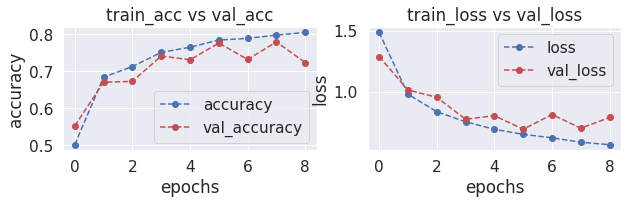

In [ ]:
plot_accuracy_loss(history_VGG16,BASE_MODEL_FIG)


In [ ]:
l,ac = model_VGG16.evaluate(test_images, test_labels)


23/23 [==============================] - 6s 248ms/step - loss: 0.7735 - accuracy: 0.7297


## Stage 2: Fine tuning

In [ ]:
FINE_TUNE_AT = 12

for layer in pretrained_model.layers[:FINE_TUNE_AT]: layer.trainable = False
for layer in pretrained_model.layers[FINE_TUNE_AT:]: layer.trainable = True

In [ ]:
from tensorflow.keras.optimizers import SGD
model_VGG16.compile(
    optimizer = SGD(learning_rate=1e-4, momentum=0.9), 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

In [ ]:
start = time.time()

history_VGG16_ft = model_VGG16.fit(train_images, train_labels, batch_size = 32, epochs = TOTAL_EPOCHS, validation_data = (val_images, val_labels),
    callbacks = [fine_tune_checkpointer,early_stopping],
    verbose = 1,
)

end = time.time()
duration = end - start
print('\n Model built training took %0.2f seconds (%0.1f minutes) to train'%(duration, duration/60))
model_VGG16.save(FINE_TUNE_MODEL_TRAINED)

Epoch 1/30
161/161 [==============================] - 40s 246ms/step - loss: 2.2654 - accuracy: 0.1697 - val_loss: 2.1301 - val_accuracy: 0.3027

Epoch 00001: val_loss did not improve from 0.48410
Epoch 2/30
161/161 [==============================] - 38s 233ms/step - loss: 1.9638 - accuracy: 0.3317 - val_loss: 1.6764 - val_accuracy: 0.4965

Epoch 00002: val_loss did not improve from 0.48410
Epoch 3/30
161/161 [==============================] - 38s 234ms/step - loss: 1.4294 - accuracy: 0.5219 - val_loss: 1.1397 - val_accuracy: 0.6202

Epoch 00003: val_loss did not improve from 0.48410
Epoch 4/30
161/161 [==============================] - 38s 238ms/step - loss: 1.0569 - accuracy: 0.6418 - val_loss: 0.8738 - val_accuracy: 0.7300

Epoch 00004: val_loss did not improve from 0.48410
Epoch 5/30
161/161 [==============================] - 38s 235ms/step - loss: 0.8798 - accuracy: 0.7016 - val_loss: 0.7874 - val_accuracy: 0.7541

Epoch 00005: val_loss did not improve from 0.48410
Epoch 6/30
161/

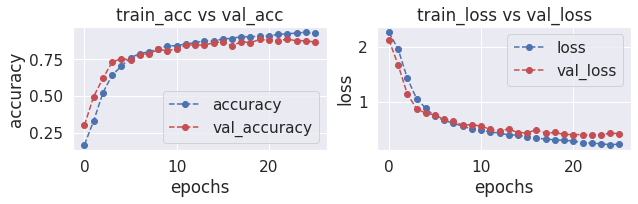

In [ ]:
plot_accuracy_loss(history_VGG16_ft,FINE_TUNE_MODE_FIG)

In [ ]:
loss, acc = model_VGG16.evaluate(test_images, test_labels)

23/23 [==============================] - 3s 137ms/step - loss: 0.4407 - accuracy: 0.8557


# Implemens InceptionResnetV2

## Stage 1: Tranfer learning

In [ ]:
if not os.path.exists('Models/InceptionResNetV2'):
    os.mkdir('Models/InceptionResNetV2')
PATH = 'Models/InceptionResNetV2'

BASE_MODEL_BEST = os.path.join(PATH, 'base_model_best.hdf5')
BASE_MODEL_TRAINED = os.path.join(PATH, 'base_model_trained.hdf5')
BASE_MODEL_FIG = os.path.join(PATH, 'base_model_fig.jpg')

FINE_TUNE_MODEL_BEST = os.path.join(PATH, 'fine_tune_model_best.hdf5')
FINE_TUNE_MODEL_TRAINED = os.path.join(PATH, 'fine_tune_model_trained.hdf5')
FINE_TUNE_MODE_FIG = os.path.join(PATH, 'fine_tune_model_fig.jpg')

Callbacks

In [ ]:
base_checkpointer = ModelCheckpoint(
    filepath = BASE_MODEL_BEST, 
    save_best_only = True, 
    verbose = 1
)

fine_tune_checkpointer = ModelCheckpoint(
    filepath = FINE_TUNE_MODEL_BEST, 
    save_best_only = True,
    verbose = 1, 
)

# Stop if no improvement after 3 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

pretrained_model = InceptionResNetV2(weights='imagenet', include_top=False)
last_output = pretrained_model.output
x = GlobalAveragePooling2D()(last_output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(nb_classes, activation='softmax')(x)
model_InceptionResNetV2 = Model(inputs=pretrained_model.input, outputs=outputs)

In [ ]:
for layer in pretrained_model.layers: layer.trainable = False
model_InceptionResNetV2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
INITIAL_EPOCHS = 15
FINE_TUNE_EPOCHS = 20

In [ ]:
start = time.time()

history_InceptionResNetV2 = model_InceptionResNetV2.fit(train_images, train_labels, batch_size = 32, epochs = INITIAL_EPOCHS, validation_data = (val_images, val_labels),
    callbacks = [base_checkpointer,early_stopping],
    verbose = 1,
)

end = time.time()
duration = end - start
print('\n Model built training took %0.2f seconds (%0.1f minutes) to train'%(duration, duration/60))
model_InceptionResNetV2.save(BASE_MODEL_TRAINED)

Epoch 1/15
201/201 [==============================] - 63s 268ms/step - loss: 1.2843 - accuracy: 0.6297 - val_loss: 0.8006 - val_accuracy: 0.7259

Epoch 00001: val_loss improved from inf to 0.80061, saving model to Models/InceptionResNetV2/base_model_best.hdf5
Epoch 2/15
201/201 [==============================] - 47s 233ms/step - loss: 0.7060 - accuracy: 0.7616 - val_loss: 0.7979 - val_accuracy: 0.7253

Epoch 00002: val_loss improved from 0.80061 to 0.79795, saving model to Models/InceptionResNetV2/base_model_best.hdf5
Epoch 3/15
201/201 [==============================] - 47s 233ms/step - loss: 0.5883 - accuracy: 0.8004 - val_loss: 0.5602 - val_accuracy: 0.8139

Epoch 00003: val_loss improved from 0.79795 to 0.56024, saving model to Models/InceptionResNetV2/base_model_best.hdf5
Epoch 4/15
201/201 [==============================] - 47s 234ms/step - loss: 0.5217 - accuracy: 0.8180 - val_loss: 0.5963 - val_accuracy: 0.8055

Epoch 00004: val_loss did not improve from 0.56024
Epoch 5/15
201/

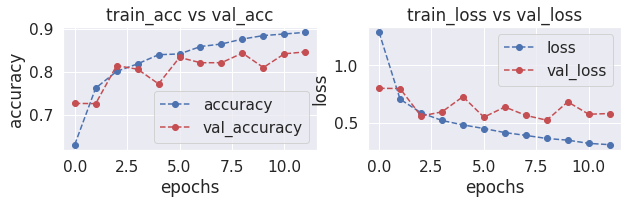

In [ ]:
plot_accuracy_loss(history_InceptionResNetV2,BASE_MODEL_FIG)

In [ ]:
loss, accuracy = model_InceptionResNetV2.evaluate(test_images, test_labels)

27/27 [==============================] - 12s 425ms/step - loss: 0.4891 - accuracy: 0.8548


## Stage 2: Fine tuning

In [ ]:
FINE_TUNE_AT = 711

for layer in pretrained_model.layers[:FINE_TUNE_AT]: layer.trainable = False
for layer in pretrained_model.layers[FINE_TUNE_AT:]: layer.trainable = True

In [ ]:
model_InceptionResNetV2.compile(
    optimizer = SGD(learning_rate=1e-4, momentum=0.9), 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

In [ ]:
start = time.time()

history_InceptionResNetV2_ft = model_InceptionResNetV2.fit(train_images, train_labels, batch_size = 32, epochs = FINE_TUNE_EPOCHS, validation_data = (val_images, val_labels),
    callbacks = [fine_tune_checkpointer,early_stopping],
    verbose = 1,
)

end = time.time()
duration = end - start
print('\n Model built training took %0.2f seconds (%0.1f minutes) to train'%(duration, duration/60))
model_InceptionResNetV2.save(FINE_TUNE_MODEL_TRAINED)

Epoch 1/20
201/201 [==============================] - 65s 274ms/step - loss: 2.0040 - accuracy: 0.3192 - val_loss: 1.7012 - val_accuracy: 0.4905

Epoch 00001: val_loss improved from inf to 1.70124, saving model to Models/InceptionResNetV2/fine_tune_model_best.hdf5
Epoch 2/20
201/201 [==============================] - 51s 254ms/step - loss: 1.5607 - accuracy: 0.5589 - val_loss: 1.3871 - val_accuracy: 0.6536

Epoch 00002: val_loss improved from 1.70124 to 1.38709, saving model to Models/InceptionResNetV2/fine_tune_model_best.hdf5
Epoch 3/20
201/201 [==============================] - 51s 253ms/step - loss: 1.2396 - accuracy: 0.6660 - val_loss: 1.1131 - val_accuracy: 0.7063

Epoch 00003: val_loss improved from 1.38709 to 1.11315, saving model to Models/InceptionResNetV2/fine_tune_model_best.hdf5
Epoch 4/20
201/201 [==============================] - 51s 253ms/step - loss: 0.9965 - accuracy: 0.7220 - val_loss: 0.9128 - val_accuracy: 0.7433

Epoch 00004: val_loss improved from 1.11315 to 0.91

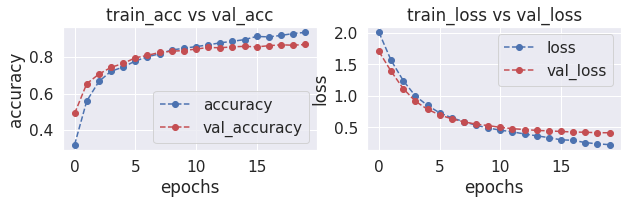

In [ ]:
plot_accuracy_loss(history_InceptionResNetV2_ft,FINE_TUNE_MODE_FIG)


In [ ]:
loss, accuracy = model_InceptionResNetV2.evaluate(test_images, test_labels)


23/23 [==============================] - 5s 198ms/step - loss: 0.4627 - accuracy: 0.8585


# Implements InceptionV3

## Stage 1: Tranfer leanring

In [ ]:
if not os.path.exists('Models/InceptionV3'):
    os.mkdir('Models/InceptionV3')
PATH = 'Models/InceptionV3'

BASE_MODEL_BEST = os.path.join(PATH, 'base_model_best.hdf5')
BASE_MODEL_TRAINED = os.path.join(PATH, 'base_model_trained.hdf5')
BASE_MODEL_FIG = os.path.join(PATH, 'base_model_fig.jpg')

FINE_TUNE_MODEL_BEST = os.path.join(PATH, 'fine_tune_model_best.hdf5')
FINE_TUNE_MODEL_TRAINED = os.path.join(PATH, 'fine_tune_model_trained.hdf5')
FINE_TUNE_MODE_FIG = os.path.join(PATH, 'fine_tune_model_fig.jpg')

In [ ]:
base_checkpointer = ModelCheckpoint(
    filepath = BASE_MODEL_BEST, 
    save_best_only = True, 
    verbose = 1
)

fine_tune_checkpointer = ModelCheckpoint(
    filepath = FINE_TUNE_MODEL_BEST, 
    save_best_only = True,
    verbose = 1, 
)

# Stop if no improvement after 3 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
pretrained_model = InceptionV3(weights='imagenet', include_top=False)
last_output = pretrained_model.output
x = GlobalAveragePooling2D()(last_output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(nb_classes, activation='softmax')(x)
model_InceptionV3 = Model(inputs=pretrained_model.input, outputs=outputs)

In [ ]:
for layer in pretrained_model.layers: layer.trainable = False
model_InceptionV3.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
INITIAL_EPOCHS = 15
FINE_TUNE_EPOCHS = 20

In [ ]:
start = time.time()

history_InceptionV3 = model_InceptionV3.fit(train_images, train_labels, batch_size = 32, epochs = INITIAL_EPOCHS, validation_data = (val_images, val_labels),
    callbacks = [base_checkpointer,early_stopping],
    verbose = 1,
)

end = time.time()
duration = end - start
print('\n Model built training took %0.2f seconds (%0.1f minutes) to train'%(duration, duration/60))
model_InceptionV3.save(BASE_MODEL_TRAINED)

Epoch 1/15
161/161 [==============================] - 38s 107ms/step - loss: 1.5740 - accuracy: 0.5885 - val_loss: 1.3012 - val_accuracy: 0.6342

Epoch 00001: val_loss improved from inf to 1.30117, saving model to Models/InceptionV3/base_model_best.hdf5
Epoch 2/15
161/161 [==============================] - 14s 88ms/step - loss: 0.7821 - accuracy: 0.7458 - val_loss: 0.6543 - val_accuracy: 0.7549

Epoch 00002: val_loss improved from 1.30117 to 0.65427, saving model to Models/InceptionV3/base_model_best.hdf5
Epoch 3/15
161/161 [==============================] - 15s 90ms/step - loss: 0.6235 - accuracy: 0.7933 - val_loss: 0.7853 - val_accuracy: 0.7556

Epoch 00003: val_loss did not improve from 0.65427
Epoch 4/15
161/161 [==============================] - 15s 91ms/step - loss: 0.5579 - accuracy: 0.8100 - val_loss: 0.4697 - val_accuracy: 0.8389

Epoch 00004: val_loss improved from 0.65427 to 0.46965, saving model to Models/InceptionV3/base_model_best.hdf5
Epoch 5/15
161/161 [================

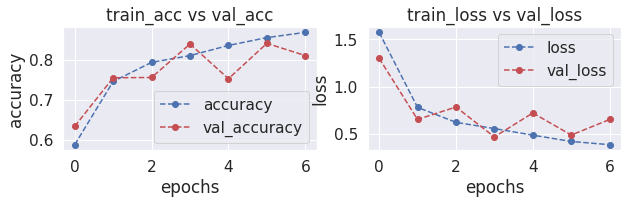

In [ ]:
plot_accuracy_loss(history_InceptionV3, BASE_MODEL_FIG)

In [ ]:
loss, accuracy = model_InceptionV3.evaluate(test_images, test_labels)


23/23 [==============================] - 3s 111ms/step - loss: 0.6993 - accuracy: 0.7857


## Stage 2: Fine Tuning

In [ ]:
FINE_TUNE_AT = 249

for layer in pretrained_model.layers[:FINE_TUNE_AT]: layer.trainable = False
for layer in pretrained_model.layers[FINE_TUNE_AT:]: layer.trainable = True

In [ ]:
model_InceptionV3.compile(
    optimizer = SGD(learning_rate=1e-4, momentum=0.9), 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

In [ ]:
start = time.time()

history_InceptionV3_ft = model_InceptionV3.fit(train_images, train_labels, batch_size = 32, epochs = FINE_TUNE_EPOCHS, validation_data = (val_images, val_labels),
    callbacks = [fine_tune_checkpointer,early_stopping],
    verbose = 1,
)

end = time.time()
duration = end - start
print('\n Model built training took %0.2f seconds (%0.1f minutes) to train'%(duration, duration/60))
model_InceptionV3.save(FINE_TUNE_MODEL_TRAINED)

Epoch 1/20
161/161 [==============================] - 24s 122ms/step - loss: 2.1440 - accuracy: 0.2476 - val_loss: 1.7827 - val_accuracy: 0.4459

Epoch 00001: val_loss improved from inf to 1.78268, saving model to Models/InceptionV3/fine_tune_model_best.hdf5
Epoch 2/20
161/161 [==============================] - 18s 111ms/step - loss: 1.6786 - accuracy: 0.5052 - val_loss: 1.4697 - val_accuracy: 0.6109

Epoch 00002: val_loss improved from 1.78268 to 1.46974, saving model to Models/InceptionV3/fine_tune_model_best.hdf5
Epoch 3/20
161/161 [==============================] - 17s 109ms/step - loss: 1.3703 - accuracy: 0.6327 - val_loss: 1.2196 - val_accuracy: 0.6981

Epoch 00003: val_loss improved from 1.46974 to 1.21961, saving model to Models/InceptionV3/fine_tune_model_best.hdf5
Epoch 4/20
161/161 [==============================] - 18s 109ms/step - loss: 1.1190 - accuracy: 0.7086 - val_loss: 1.0200 - val_accuracy: 0.7502

Epoch 00004: val_loss improved from 1.21961 to 1.01997, saving model 

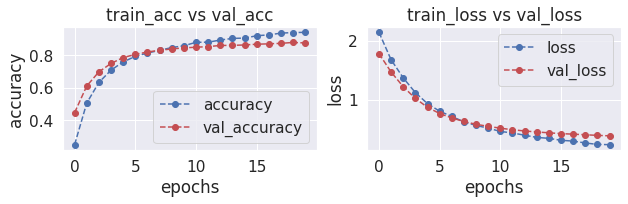

In [ ]:
plot_accuracy_loss(history_InceptionV3_ft,FINE_TUNE_MODE_FIG)


In [ ]:
loss, accuracy = model_InceptionV3.evaluate(test_images, test_labels)

23/23 [==============================] - 2s 73ms/step - loss: 0.4456 - accuracy: 0.8487


# Implements VGG19

## Stage 1: Tranfer learning

In [ ]:
if not os.path.exists('Models/VGG19'):
    os.mkdir('Models/VGG19')
PATH = 'Models/VGG19'

BASE_MODEL_BEST = os.path.join(PATH, 'base_model_best.hdf5')
BASE_MODEL_TRAINED = os.path.join(PATH, 'base_model_trained.hdf5')
BASE_MODEL_FIG = os.path.join(PATH, 'base_model_fig.jpg')

FINE_TUNE_MODEL_BEST = os.path.join(PATH, 'fine_tune_model_best.hdf5')
FINE_TUNE_MODEL_TRAINED = os.path.join(PATH, 'fine_tune_model_trained.hdf5')
FINE_TUNE_MODE_FIG = os.path.join(PATH, 'fine_tune_model_fig.jpg')

In [ ]:
base_checkpointer = ModelCheckpoint(
    filepath = BASE_MODEL_BEST, 
    save_best_only = True, 
    verbose = 1
)

fine_tune_checkpointer = ModelCheckpoint(
    filepath = FINE_TUNE_MODEL_BEST, 
    save_best_only = True,
    verbose = 1, 
)

# Stop if no improvement after 3 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [ ]:
INITIAL_EPOCHS = 15
FINE_TUNE_EPOCHS = 20

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
pretrained_model = VGG19(weights='imagenet', include_top=False)
last_output = pretrained_model.output
x = GlobalAveragePooling2D()(last_output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(nb_classes, activation='softmax')(x)
model_VGG19 = Model(inputs=pretrained_model.input, outputs=outputs)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in pretrained_model.layers: layer.trainable = False
model_VGG19.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start = time.time()

history_VGG19 = model_VGG19.fit(train_images, train_labels, batch_size = 32, epochs = INITIAL_EPOCHS, validation_data = (val_images, val_labels),
    callbacks = [base_checkpointer,early_stopping],
    verbose = 1,
)

end = time.time()
duration = end - start
print('\n Model built training took %0.2f seconds (%0.1f minutes) to train'%(duration, duration/60))
model_VGG19.save(BASE_MODEL_TRAINED)

Epoch 1/15
123/123 [==============================] - 84s 378ms/step - loss: 2.1926 - accuracy: 0.2174 - val_loss: 1.9717 - val_accuracy: 0.4177

Epoch 00001: val_loss improved from inf to 1.97171, saving model to Models/VGG19/base_model_best.hdf5
Epoch 2/15
123/123 [==============================] - 36s 297ms/step - loss: 1.9062 - accuracy: 0.3912 - val_loss: 1.7298 - val_accuracy: 0.5288

Epoch 00002: val_loss improved from 1.97171 to 1.72976, saving model to Models/VGG19/base_model_best.hdf5
Epoch 3/15
123/123 [==============================] - 36s 297ms/step - loss: 1.6985 - accuracy: 0.4813 - val_loss: 1.5332 - val_accuracy: 0.5988

Epoch 00003: val_loss improved from 1.72976 to 1.53320, saving model to Models/VGG19/base_model_best.hdf5
Epoch 4/15
123/123 [==============================] - 37s 297ms/step - loss: 1.5536 - accuracy: 0.5289 - val_loss: 1.3915 - val_accuracy: 0.6543

Epoch 00004: val_loss improved from 1.53320 to 1.39145, saving model to Models/VGG19/base_model_best.h

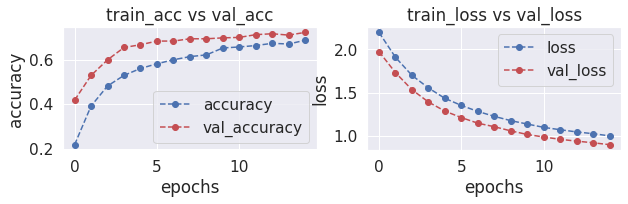

In [ ]:
plot_accuracy_loss(history_VGG19,BASE_MODEL_FIG)

In [ ]:
loss, accuracy = model_VGG19.evaluate(test_images, test_labels)

14/14 [==============================] - 10s 715ms/step - loss: 1.0270 - accuracy: 0.6819


## Stage 2: Fine Tuning

In [ ]:
FINE_TUNE_AT = 12

for layer in pretrained_model.layers[:FINE_TUNE_AT]: layer.trainable = False
for layer in pretrained_model.layers[FINE_TUNE_AT:]: layer.trainable = True

In [ ]:
model_VGG19.compile(
    optimizer = SGD(learning_rate=1e-4, momentum=0.9), 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

In [ ]:
start = time.time()

history_VGG19_ft = model_VGG19.fit(train_images, train_labels, batch_size = 32, epochs = FINE_TUNE_EPOCHS, validation_data = (val_images, val_labels),
    callbacks = [fine_tune_checkpointer,early_stopping],
    verbose = 1,
)

end = time.time()
duration = end - start
print('\n Model built training took %0.2f seconds (%0.1f minutes) to train'%(duration, duration/60))
model_VGG19.save(FINE_TUNE_MODEL_TRAINED)

Epoch 1/20
123/123 [==============================] - 138s 756ms/step - loss: 2.2963 - accuracy: 0.1405 - val_loss: 2.2085 - val_accuracy: 0.2366

Epoch 00001: val_loss improved from inf to 2.20846, saving model to Models/VGG19/fine_tune_model_best.hdf5
Epoch 2/20
123/123 [==============================] - 77s 624ms/step - loss: 2.0737 - accuracy: 0.2652 - val_loss: 1.8562 - val_accuracy: 0.3786

Epoch 00002: val_loss improved from 2.20846 to 1.85616, saving model to Models/VGG19/fine_tune_model_best.hdf5
Epoch 3/20
123/123 [==============================] - 77s 623ms/step - loss: 1.5718 - accuracy: 0.4543 - val_loss: 1.3646 - val_accuracy: 0.5021

Epoch 00003: val_loss improved from 1.85616 to 1.36459, saving model to Models/VGG19/fine_tune_model_best.hdf5
Epoch 4/20
123/123 [==============================] - 77s 624ms/step - loss: 1.1829 - accuracy: 0.5958 - val_loss: 0.9890 - val_accuracy: 0.6296

Epoch 00004: val_loss improved from 1.36459 to 0.98904, saving model to Models/VGG19/f

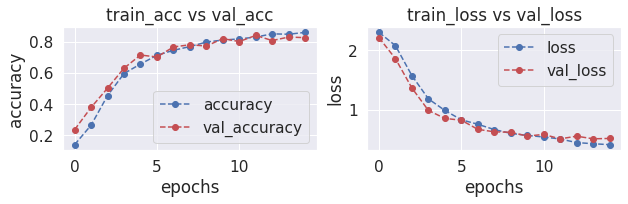

In [ ]:
plot_accuracy_loss(history_VGG19_ft,FINE_TUNE_MODE_FIG)

In [ ]:
loss, accuracy = model_VGG19.evaluate(test_images, test_labels)


14/14 [==============================] - 14s 1s/step - loss: 0.6048 - accuracy: 0.8261


# Implement MobileNetV2

In [ ]:
if not os.path.exists('Models/MobileNetV2'):
    os.mkdir('Models/MobileNetV2')
PATH = 'Models/MobileNetV2'

BASE_MODEL_BEST = os.path.join(PATH, 'base_model_best.hdf5')
BASE_MODEL_TRAINED = os.path.join(PATH, 'base_model_trained.hdf5')
BASE_MODEL_FIG = os.path.join(PATH, 'base_model_fig.jpg')

FINE_TUNE_MODEL_BEST = os.path.join(PATH, 'fine_tune_model_best.hdf5')
FINE_TUNE_MODEL_TRAINED = os.path.join(PATH, 'fine_tune_model_trained.hdf5')
FINE_TUNE_MODE_FIG = os.path.join(PATH, 'fine_tune_model_fig.jpg')

In [ ]:
base_checkpointer = ModelCheckpoint(
    filepath = BASE_MODEL_BEST, 
    save_best_only = True, 
    verbose = 1
)

fine_tune_checkpointer = ModelCheckpoint(
    filepath = FINE_TUNE_MODEL_BEST, 
    save_best_only = True,
    verbose = 1, 
)

# Stop if no improvement after 3 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [ ]:
INITIAL_EPOCHS = 15
FINE_TUNE_EPOCHS = 20
FINE_TUNE_AT = 134

In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False)
last_output = pretrained_model.output
x = GlobalAveragePooling2D()(last_output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(nb_classes, activation='softmax')(x)
model_MobileNetv2 = Model(inputs=pretrained_model.input, outputs=outputs)

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
for layer in pretrained_model.layers[:FINE_TUNE_AT]: layer.trainable = False
for layer in pretrained_model.layers[FINE_TUNE_AT:]: layer.trainable = True

In [ ]:
model_MobileNetv2.compile(
    optimizer = SGD(learning_rate=1e-4, momentum=0.9), 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

In [ ]:
start = time.time()

history_MBnetv2_ft = model_MobileNetv2.fit(train_images, train_labels, batch_size = 32, epochs = FINE_TUNE_EPOCHS, validation_data = (val_images, val_labels),
    callbacks = [fine_tune_checkpointer,early_stopping],
    verbose = 1,
)

end = time.time()
duration = end - start
print('\n Model built training took %0.2f seconds (%0.1f minutes) to train'%(duration, duration/60))
model_MobileNetv2.save(FINE_TUNE_MODEL_TRAINED)

Epoch 1/20
123/123 [==============================] - 53s 160ms/step - loss: 2.2221 - accuracy: 0.2077 - val_loss: 1.9967 - val_accuracy: 0.3066

Epoch 00001: val_loss improved from inf to 1.99670, saving model to Models/MobileNetV2/fine_tune_model_best.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
123/123 [==============================] - 17s 139ms/step - loss: 1.6411 - accuracy: 0.4910 - val_loss: 1.6038 - val_accuracy: 0.4609

Epoch 00002: val_loss improved from 1.99670 to 1.60382, saving model to Models/MobileNetV2/fine_tune_model_best.hdf5
Epoch 3/20
123/123 [==============================] - 17s 138ms/step - loss: 1.2763 - accuracy: 0.6271 - val_loss: 1.3320 - val_accuracy: 0.5535

Epoch 00003: val_loss improved from 1.60382 to 1.33195, saving model to Models/MobileNetV2/fine_tune_model_best.hdf5
Epoch 4/20
123/123 [==============================] - 17s 139ms/step - loss: 1.0425 - accuracy: 0.7129 - val_loss: 1.1309 - val_accuracy: 0.6502

Epoch 00004: val_loss improved from 1.33195 to 1.13089, saving model to Models/MobileNetV2/fine_tune_model_best.hdf5
Epoch 5/20
123/123 [==============================] - 17s 138ms/step - loss: 0.8852 - accuracy: 0.7534 - val_loss: 0.9837 - val_accuracy: 0.6852

Epoch 00005: val_loss improved from 1.13089 to 0.98370, saving mo

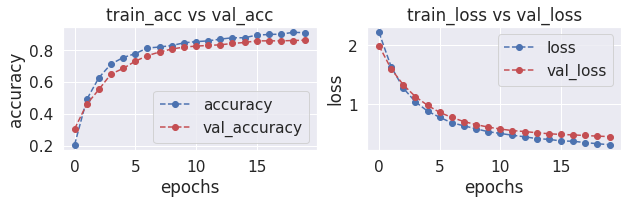

In [ ]:
plot_accuracy_loss(history_MBnetv2_ft,FINE_TUNE_MODE_FIG)

In [ ]:
loss, accuracy = model_MobileNetv2.evaluate(test_images, test_labels)

14/14 [==============================] - 2s 151ms/step - loss: 0.4501 - accuracy: 0.8535


# Implements ResNet152V2

## Stage 1: Tranfer Learning

In [ ]:
if not os.path.exists('Models/ResNet152V2'):
    os.mkdir('Models/ResNet152V2')
PATH = 'Models/ResNet152V2'

BASE_MODEL_BEST = os.path.join(PATH, 'base_model_best.hdf5')
BASE_MODEL_TRAINED = os.path.join(PATH, 'base_model_trained.hdf5')
BASE_MODEL_FIG = os.path.join(PATH, 'base_model_fig.jpg')

FINE_TUNE_MODEL_BEST = os.path.join(PATH, 'fine_tune_model_best.hdf5')
FINE_TUNE_MODEL_TRAINED = os.path.join(PATH, 'fine_tune_model_trained.hdf5')
FINE_TUNE_MODE_FIG = os.path.join(PATH, 'fine_tune_model_fig.jpg')

In [ ]:
base_checkpointer = ModelCheckpoint(
    filepath = BASE_MODEL_BEST, 
    save_best_only = True, 
    verbose = 1
)

fine_tune_checkpointer = ModelCheckpoint(
    filepath = FINE_TUNE_MODEL_BEST, 
    save_best_only = True,
    verbose = 1, 
)

# Stop if no improvement after 3 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [ ]:
INITIAL_EPOCHS = 15
FINE_TUNE_EPOCHS = 20

In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet152V2

pretrained_model = ResNet152V2(weights='imagenet', include_top=False)
last_output = pretrained_model.output
x = GlobalAveragePooling2D()(last_output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(nb_classes, activation='softmax')(x)
model_ResNet152V2 = Model(inputs=pretrained_model.input, outputs=outputs)

In [ ]:
pretrained_model.summary()

In [ ]:
for layer in pretrained_model.layers: layer.trainable = False
model_ResNet152V2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start = time.time()

history_ResNet152V2 = model_ResNet152V2.fit(train_images, train_labels, batch_size = 32, epochs = INITIAL_EPOCHS, validation_data = (val_images, val_labels),
    callbacks = [base_checkpointer,early_stopping],
    verbose = 1,
)

end = time.time()
duration = end - start
print('\n Model built training took %0.2f seconds (%0.1f minutes) to train'%(duration, duration/60))
model_ResNet152V2.save(BASE_MODEL_TRAINED)

Epoch 1/15
123/123 [==============================] - 83s 573ms/step - loss: 1.3292 - accuracy: 0.5498 - val_loss: 0.7236 - val_accuracy: 0.7798

Epoch 00001: val_loss improved from inf to 0.72358, saving model to Models/ResNet152V2/base_model_best.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/15
123/123 [==============================] - 65s 529ms/step - loss: 0.7405 - accuracy: 0.7483 - val_loss: 0.5772 - val_accuracy: 0.8148

Epoch 00002: val_loss improved from 0.72358 to 0.57723, saving model to Models/ResNet152V2/base_model_best.hdf5
Epoch 3/15
123/123 [==============================] - 65s 529ms/step - loss: 0.5858 - accuracy: 0.8063 - val_loss: 0.5272 - val_accuracy: 0.8251

Epoch 00003: val_loss improved from 0.57723 to 0.52718, saving model to Models/ResNet152V2/base_model_best.hdf5
Epoch 4/15
123/123 [==============================] - 65s 528ms/step - loss: 0.4747 - accuracy: 0.8524 - val_loss: 0.4847 - val_accuracy: 0.8477

Epoch 00004: val_loss improved from 0.52718 to 0.48475, saving model to Models/ResNet152V2/base_model_best.hdf5
Epoch 5/15
123/123 [==============================] - 65s 529ms/step - loss: 0.4116 - accuracy: 0.8621 - val_loss: 0.4676 - val_accuracy: 0.8477

Epoch 00005: val_loss improved from 0.48475 to 0.46759, saving model to Models/R

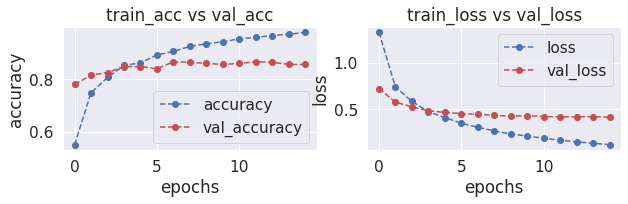

In [ ]:
plot_accuracy_loss(history_ResNet152V2,BASE_MODEL_FIG)

In [ ]:
loss, accuracy = model_ResNet152V2.evaluate(test_images, test_labels)

14/14 [==============================] - 8s 551ms/step - loss: 0.5336 - accuracy: 0.8352


## Stage 2: Fine Tuning

In [ ]:
FINE_TUNE_AT = 516

for layer in pretrained_model.layers[:FINE_TUNE_AT]: layer.trainable = False
for layer in pretrained_model.layers[FINE_TUNE_AT:]: layer.trainable = True

In [ ]:
model_ResNet152V2.compile(
    optimizer = SGD(learning_rate=1e-4, momentum=0.9), 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

In [ ]:
start = time.time()

history_ResNet152V2_ft = model_ResNet152V2.fit(train_images, train_labels, batch_size = 32, epochs = FINE_TUNE_EPOCHS, validation_data = (val_images, val_labels),
    callbacks = [fine_tune_checkpointer,early_stopping],
    verbose = 1,
)

end = time.time()
duration = end - start
print('\n Model built training took %0.2f seconds (%0.1f minutes) to train'%(duration, duration/60))
model_ResNet152V2.save(FINE_TUNE_MODEL_TRAINED)

Epoch 1/20
123/123 [==============================] - 122s 899ms/step - loss: 2.2124 - accuracy: 0.2138 - val_loss: 1.8773 - val_accuracy: 0.3786

Epoch 00001: val_loss improved from inf to 1.87731, saving model to Models/ResNet152V2/fine_tune_model_best.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
123/123 [==============================] - 105s 854ms/step - loss: 1.7373 - accuracy: 0.4548 - val_loss: 1.5280 - val_accuracy: 0.5679

Epoch 00002: val_loss improved from 1.87731 to 1.52802, saving model to Models/ResNet152V2/fine_tune_model_best.hdf5
Epoch 3/20
123/123 [==============================] - 105s 853ms/step - loss: 1.3880 - accuracy: 0.6198 - val_loss: 1.2543 - val_accuracy: 0.6605

Epoch 00003: val_loss improved from 1.52802 to 1.25425, saving model to Models/ResNet152V2/fine_tune_model_best.hdf5
Epoch 4/20
123/123 [==============================] - 105s 853ms/step - loss: 1.1124 - accuracy: 0.7147 - val_loss: 1.0440 - val_accuracy: 0.6914

Epoch 00004: val_loss improved from 1.25425 to 1.04402, saving model to Models/ResNet152V2/fine_tune_model_best.hdf5
Epoch 5/20
123/123 [==============================] - 105s 852ms/step - loss: 0.8855 - accuracy: 0.7740 - val_loss: 0.9049 - val_accuracy: 0.7243

Epoch 00005: val_loss improved from 1.04402 to 0.90488, savin

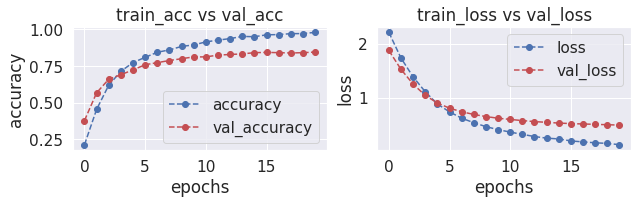

In [ ]:
plot_accuracy_loss(history_ResNet152V2_ft,FINE_TUNE_MODE_FIG)


In [ ]:
loss, accuracy = model_ResNet152V2.evaluate(test_images, test_labels)

14/14 [==============================] - 9s 638ms/step - loss: 0.5448 - accuracy: 0.8398


# Evaluation 

## Evaluate valid and test data

In [ ]:
validate_results = {}
test_results = {}
MODELS_PATH = 'Models'
BEST_MODEL = 'fine_tune_model_best.hdf5'

In [ ]:
for folder in tqdm(os.listdir(MODELS_PATH)):
    model_folder = os.path.join(MODELS_PATH, folder)
    if BEST_MODEL in os.listdir(model_folder):
        print('\n========== Evaluate', folder, 'Model ==========')
        model = load_model(os.path.join(model_folder, BEST_MODEL))
        model.compile(
            optimizer = SGD(learning_rate=1e-4, momentum=0.9),
            loss = 'sparse_categorical_crossentropy', 
            metrics = [
                'accuracy', 
                SparseTopKCategoricalAccuracy(k=3, name='sparse_top_3_categorical_accuracy', dtype=None),
                SparseTopKCategoricalAccuracy(k=5, name='sparse_top_5_categorical_accuracy', dtype=None),

            ]
        )
        print('Validate dataset:')
        validate_results[folder] = model.evaluate(val_images, val_labels)
        print('Test dataset:', )
        test_results[folder] = model.evaluate(test_images, test_labels)

  0%|          | 0/3 [00:00<?, ?it/s]


========== Evaluate VGG19 Model ==========
Validate dataset:
16/16 [==============================] - 6s 343ms/step - loss: 0.4074 - accuracy: 0.8909 - sparse_top_3_categorical_accuracy: 0.9794 - sparse_top_5_categorical_accuracy: 0.9938
Test dataset:
14/14 [==============================] - 5s 352ms/step - loss: 0.4794 - accuracy: 0.8490 - sparse_top_3_categorical_accuracy: 0.9703 - sparse_top_5_categorical_accuracy: 0.9863

========== Evaluate MobileNetV2 Model ==========
Validate dataset:
16/16 [==============================] - 3s 103ms/step - loss: 0.4524 - accuracy: 0.8621 - sparse_top_3_categorical_accuracy: 0.9774 - sparse_top_5_categorical_accuracy: 0.9979
Test dataset:
14/14 [==============================] - 2s 107ms/step - loss: 0.4501 - accuracy: 0.8535 - sparse_top_3_categorical_accuracy: 0.9771 - sparse_top_5_categorical_accuracy: 0.9886

========== Evaluate ResNet152V2 Model ==========
Validate dataset:
16/16 [==============================] - 15s 626ms/step - loss: 0.

In [ ]:
from sklearn.metrics import f1_score,recall_score, precision_score
sklearn_score_results = {}
for folder in tqdm(os.listdir(MODELS_PATH)):
    model_folder = os.path.join(MODELS_PATH, folder)
    if BEST_MODEL in os.listdir(model_folder):
        print('\n========== Evaluate', folder, 'Model ==========')
        model = load_model(os.path.join(model_folder, BEST_MODEL))
        predictions = model.predict(test_images)    
        pred_labels = np.argmax(predictions, axis = 1) 
        sklearn_score_results[folder] = [recall_score(test_labels, pred_labels, average = 'micro'), precision_score(test_labels, pred_labels,average = 'micro'), f1_score(test_labels, pred_labels,average = 'micro')]

  0%|          | 0/3 [00:00<?, ?it/s]


========== Evaluate VGG19 Model ==========

========== Evaluate MobileNetV2 Model ==========

========== Evaluate ResNet152V2 Model ==========


In [ ]:
score_results = pd.DataFrame.from_dict(sklearn_score_results, orient='index').iloc[:, 0:]
score_results.columns = ['Recall', 'Precision', 'F1']
score_results.sort_values(by=['F1'], ascending=True)

,Recall,Precision,F1
ResNet152V2,0.839817,0.839817,0.839817
VGG19,0.848970,0.848970,0.848970
MobileNetV2,0.853547,0.853547,0.853547


  0%|          | 0/3 [00:00<?, ?it/s]


========== Evaluate VGG19 Model ==========


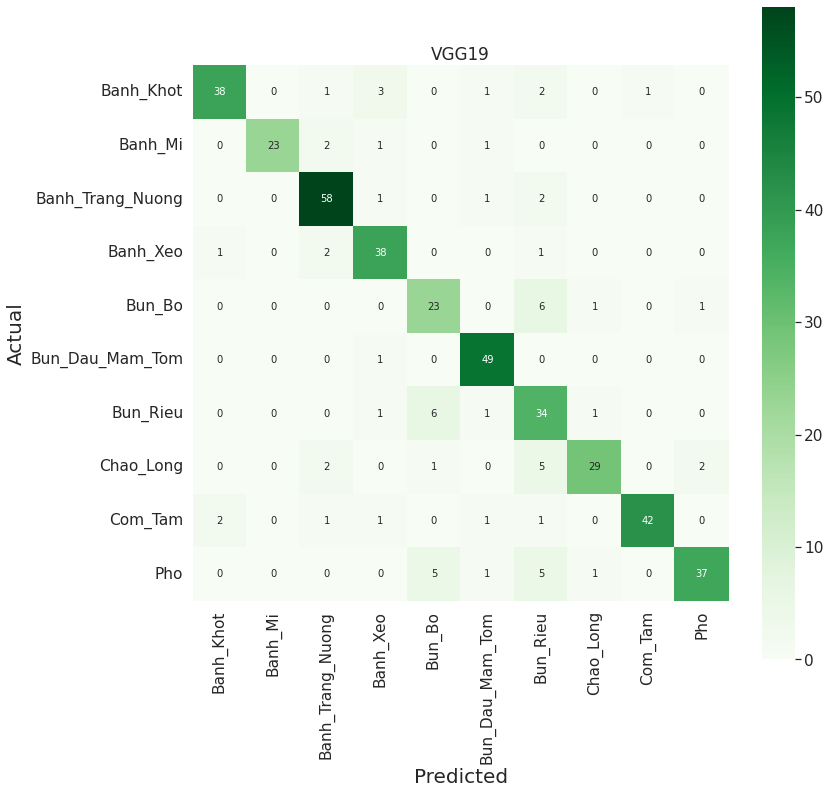


========== Evaluate MobileNetV2 Model ==========


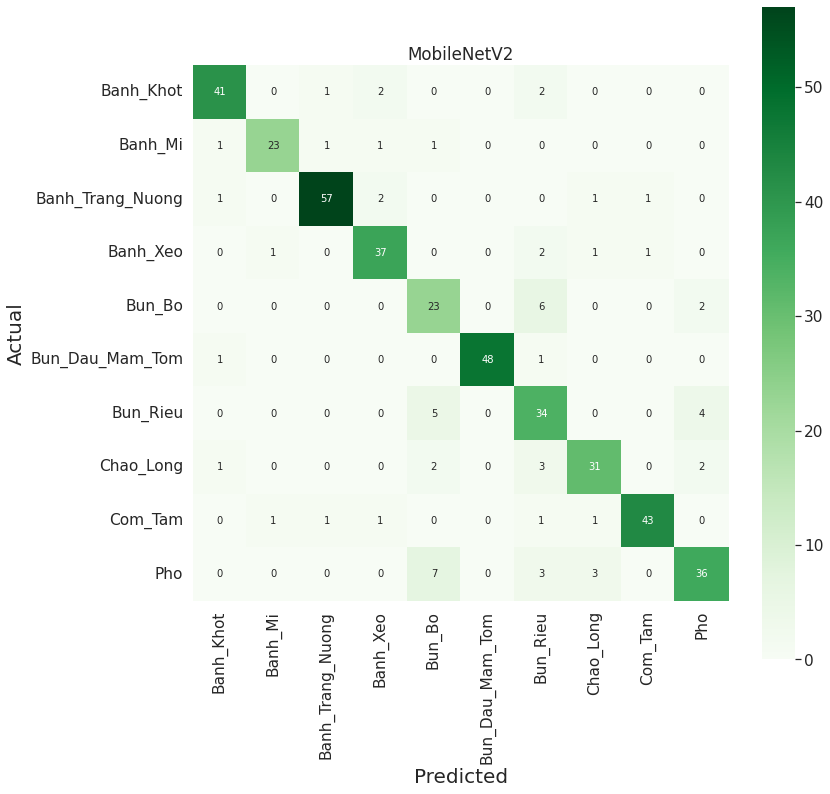


========== Evaluate ResNet152V2 Model ==========


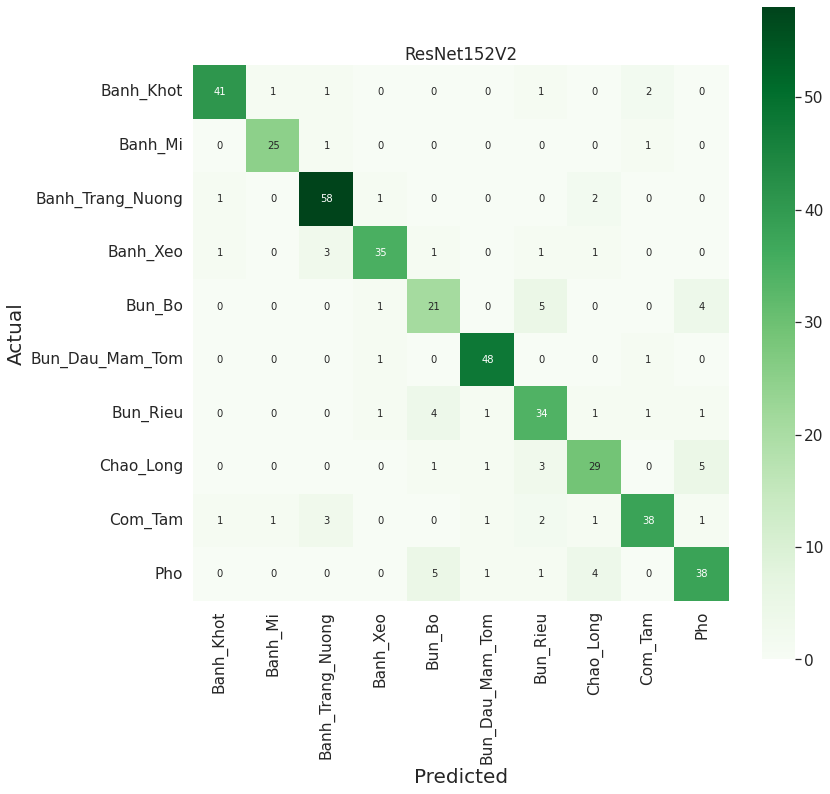

In [ ]:
for folder in tqdm(os.listdir(MODELS_PATH)):
    model_folder = os.path.join(MODELS_PATH, folder)
    if BEST_MODEL in os.listdir(model_folder):
        print('\n========== Evaluate', folder, 'Model ==========')
        model = load_model(os.path.join(model_folder, BEST_MODEL))
        predictions = model.predict(test_images)    
        pred_labels = np.argmax(predictions, axis = 1) 
        cm = confusion_matrix(test_labels, pred_labels)
        plt.figure(figsize=(12, 12))
        ax = sn.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=class_names, yticklabels=class_names)
        ax.set_ylabel('Actual', fontsize=20)
        ax.set_xlabel('Predicted', fontsize=20)
        ax.set_title(str(folder))
        plt.show()


In [ ]:
for folder in tqdm(os.listdir(MODELS_PATH)):
    model_folder = os.path.join(MODELS_PATH, folder)
    if BEST_MODEL in os.listdir(model_folder):
        print('\n========== Evaluate', folder, 'Model ==========')
        model = load_model(os.path.join(model_folder, BEST_MODEL))
        model.compile(
            optimizer = SGD(learning_rate=1e-4, momentum=0.9),
            loss = 'sparse_categorical_crossentropy', 
            metrics = [
                'accuracy', 
                SparseTopKCategoricalAccuracy(k=3, name='sparse_top_3_categorical_accuracy', dtype=None),
                SparseTopKCategoricalAccuracy(k=5, name='sparse_top_5_categorical_accuracy', dtype=None),

            ]
        )
        print('Validate dataset:')
        validate_results[folder] = model.evaluate(val_images, val_labels)
        print('Test dataset:', )
        test_results[folder] = model.evaluate(test_images, test_labels)

  0%|          | 0/5 [00:00<?, ?it/s]


========== Evaluate VGG19 Model ==========
Validate dataset:
26/26 [==============================] - 27s 193ms/step - loss: 0.1754 - accuracy: 0.9440 - sparse_top_3_categorical_accuracy: 0.9938 - sparse_top_5_categorical_accuracy: 0.9963
Test dataset:
23/23 [==============================] - 7s 321ms/step - loss: 0.1963 - accuracy: 0.9336 - sparse_top_3_categorical_accuracy: 0.9959 - sparse_top_5_categorical_accuracy: 0.9972

========== Evaluate VGG16 Model ==========
Validate dataset:
26/26 [==============================] - 3s 120ms/step - loss: 0.2800 - accuracy: 0.9179 - sparse_top_3_categorical_accuracy: 0.9888 - sparse_top_5_categorical_accuracy: 0.9975
Test dataset:
23/23 [==============================] - 3s 123ms/step - loss: 0.2827 - accuracy: 0.9142 - sparse_top_3_categorical_accuracy: 0.9889 - sparse_top_5_categorical_accuracy: 0.9959

========== Evaluate ResNet152V2 Model ==========
Validate dataset:
26/26 [==============================] - 11s 232ms/step - loss: 0.1181 

In [ ]:
validate_report = pd.DataFrame.from_dict(validate_results, orient='index').iloc[:, 1:]
validate_report.columns = ['Accuracy', 'Top 3 Accuracy', 'Top 5 Accuracy']
validate_report.sort_values(by=['Accuracy'], ascending=True)

,Accuracy,Top 3 Accuracy,Top 5 Accuracy
VGG16,0.917910,0.988806,0.997512
InceptionV3,0.932836,0.988806,0.995025
VGG19,0.944030,0.993781,0.996269
InceptionResNetV2,0.951493,0.990050,0.997512
ResNet152V2,0.971393,0.991294,0.997512


In [ ]:
test_report = pd.DataFrame.from_dict(test_results, orient='index').iloc[:, 1:]
test_report.columns = ['Accuracy', 'Top 3 Accuracy', 'Top 5 Accuracy']
test_report.sort_values(by=['Accuracy'], ascending=True)

,Accuracy,Top 3 Accuracy,Top 5 Accuracy
VGG16,0.914246,0.988935,0.995851
VGG19,0.933610,0.995851,0.997234
InceptionV3,0.936376,0.990318,0.995851
InceptionResNetV2,0.946058,0.988935,1.000000
ResNet152V2,0.966805,0.995851,1.000000


In [ ]:
validate_report.to_csv(r'validate_report.csv')
test_report.to_csv(r'test_report.csv')

## Recall_score, Precision_score and F1_score

In [ ]:
from sklearn.metrics import f1_score,recall_score, precision_score
sklearn_score_results = {}
for folder in tqdm(os.listdir(MODELS_PATH)):
    model_folder = os.path.join(MODELS_PATH, folder)
    if BEST_MODEL in os.listdir(model_folder):
        print('\n========== Evaluate', folder, 'Model ==========')
        model = load_model(os.path.join(model_folder, BEST_MODEL))
        predictions = model.predict(test_images)    
        pred_labels = np.argmax(predictions, axis = 1) 
        sklearn_score_results[folder] = [recall_score(test_labels, pred_labels, average = 'micro'), precision_score(test_labels, pred_labels,average = 'micro'), f1_score(test_labels, pred_labels,average = 'micro')]

  0%|          | 0/5 [00:00<?, ?it/s]


========== Evaluate VGG19 Model ==========

========== Evaluate VGG16 Model ==========

========== Evaluate ResNet152V2 Model ==========

========== Evaluate InceptionV3 Model ==========

========== Evaluate InceptionResNetV2 Model ==========


In [ ]:
score_results = pd.DataFrame.from_dict(sklearn_score_results, orient='index').iloc[:, 0:]
score_results.columns = ['Recall', 'Precision', 'F1']
score_results.sort_values(by=['F1'], ascending=True)

,Recall,Precision,F1
VGG16,0.914246,0.914246,0.914246
VGG19,0.933610,0.933610,0.933610
InceptionV3,0.936376,0.936376,0.936376
InceptionResNetV2,0.946058,0.946058,0.946058
ResNet152V2,0.966805,0.966805,0.966805


## Confusion_matrix

  0%|          | 0/5 [00:00<?, ?it/s]


========== Evaluate InceptionV3 Model ==========


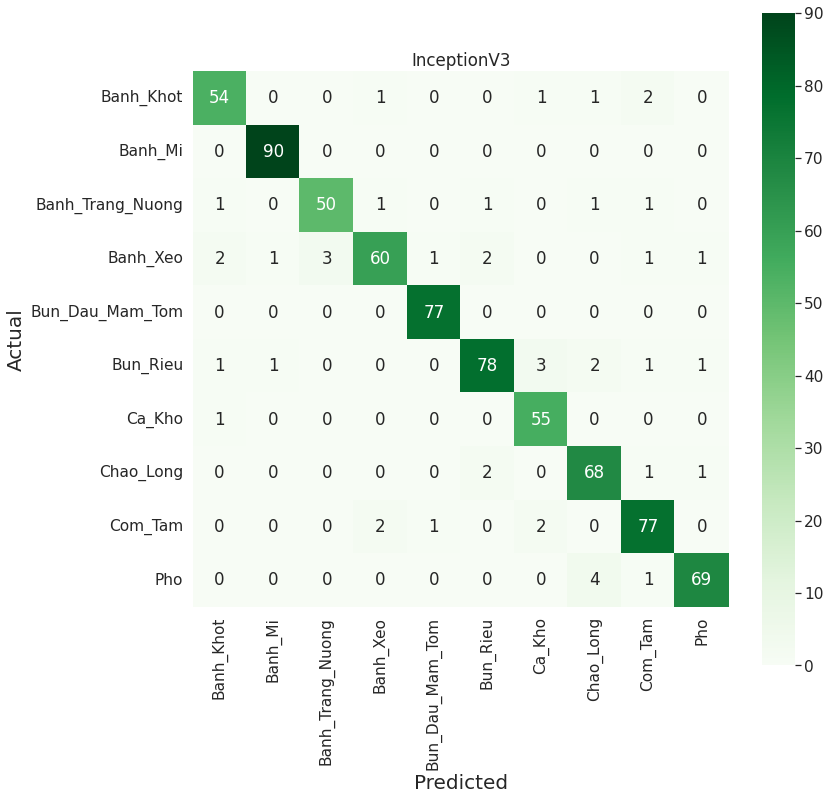


========== Evaluate VGG19 Model ==========


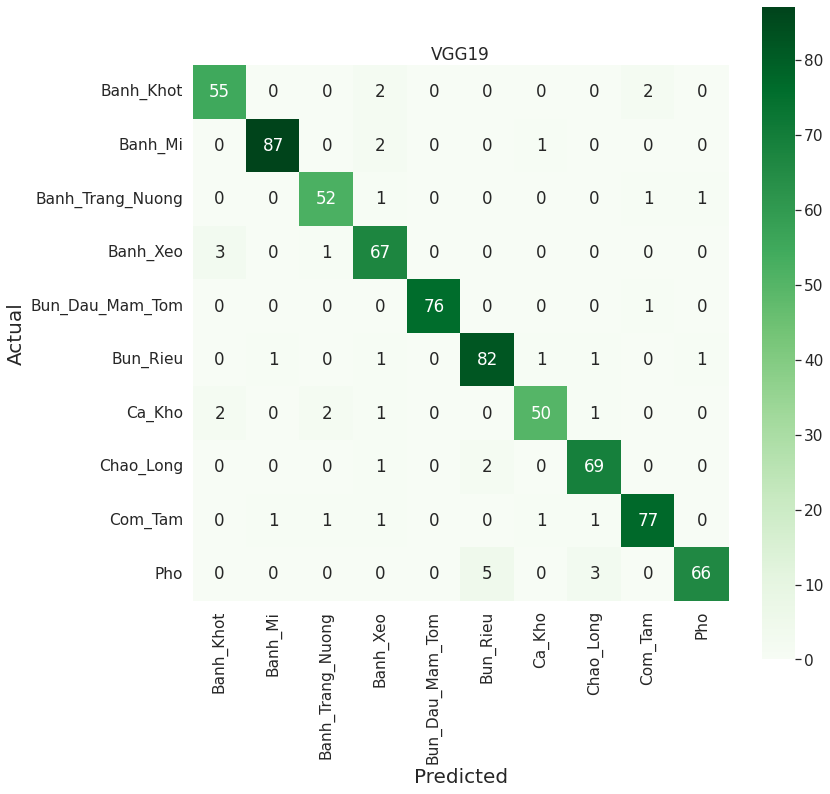


========== Evaluate InceptionResNetV2 Model ==========


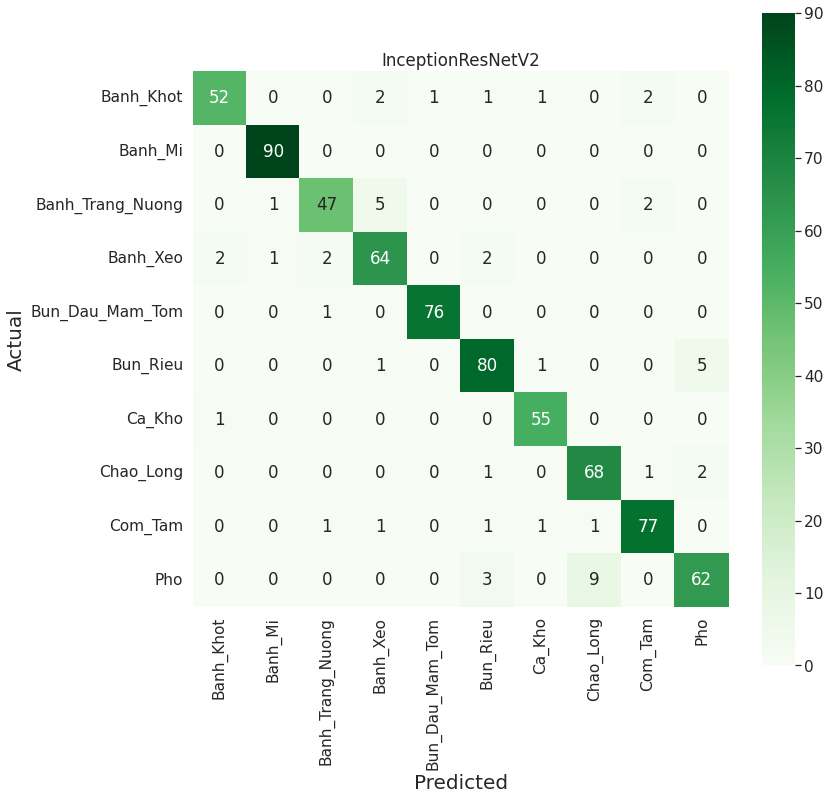


========== Evaluate VGG16 Model ==========


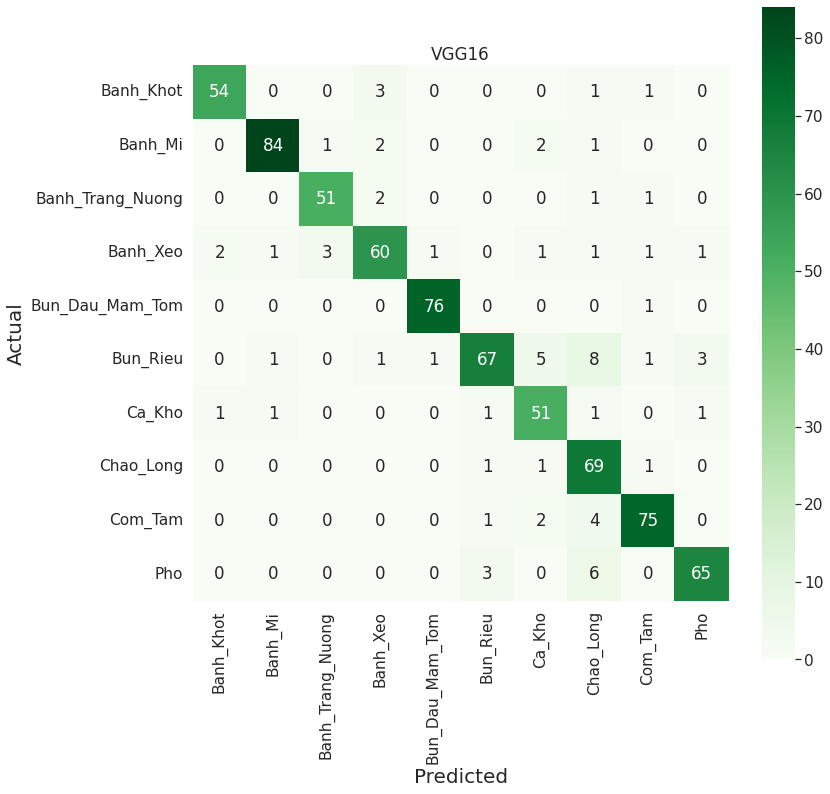


========== Evaluate ResNet152V2 Model ==========


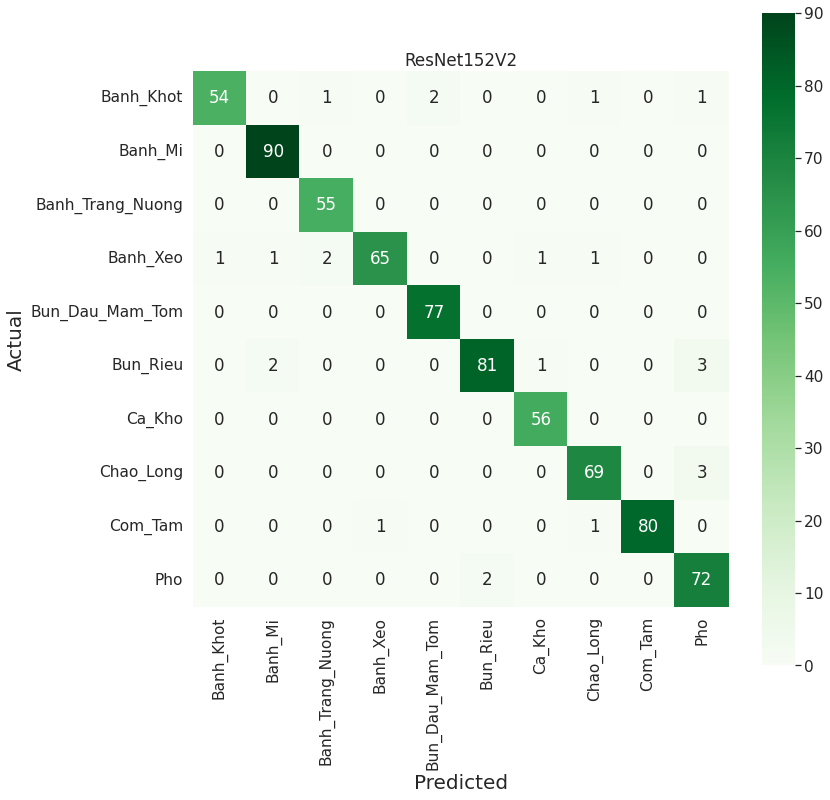

In [ ]:
for folder in tqdm(os.listdir(MODELS_PATH)):
    model_folder = os.path.join(MODELS_PATH, folder)
    if BEST_MODEL in os.listdir(model_folder):
        print('\n========== Evaluate', folder, 'Model ==========')
        model = load_model(os.path.join(model_folder, BEST_MODEL))
        predictions = model.predict(test_images)    
        pred_labels = np.argmax(predictions, axis = 1) 
        cm = confusion_matrix(test_labels, pred_labels)
        plt.figure(figsize=(12, 12))
        ax = sn.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=class_names, yticklabels=class_names)
        ax.set_ylabel('Actual', fontsize=20)
        ax.set_xlabel('Predicted', fontsize=20)
        ax.set_title(str(folder))
        plt.show()
